In [30]:
import os
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [ ]:
def load_data(train_path, test_path):
    with open(train_path, 'rb') as f:
        train_data = pickle.load(f)
    with open(test_path, 'rb') as f:
        test_data = pickle.load(f)
    return train_data, test_data


train_data, test_data = load_data('lego-train.pickle', 'lego-test.pickle')

X_train = np.array([sample for sample, _ in train_data])
y_train = np.array([label for _, label in train_data])
X_test = np.array([sample for sample, _ in test_data])
y_test = np.array([label for _, label in test_data])

# Нормализация
X_train = X_train / 255.0
X_test = X_test / 255.0

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [88]:
model = Sequential([
    Input(shape=X_train.shape[1:]),

    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])


In [89]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32
)


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1597 - loss: 2.2611 - val_accuracy: 0.1978 - val_loss: 2.1723
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2520 - loss: 2.1009 - val_accuracy: 0.3626 - val_loss: 2.0177
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3147 - loss: 1.9402 - val_accuracy: 0.3516 - val_loss: 1.8454
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3019 - loss: 1.8387 - val_accuracy: 0.4396 - val_loss: 1.7656
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4220 - loss: 1.6840 - val_accuracy: 0.3187 - val_loss: 1.7083
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4136 - loss: 1.6394 - val_accuracy: 0.4725 - val_loss: 1.6485
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5072 - loss: 1.4931 - val_accuracy: 0.4835 - val_loss: 1.5976
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5865 - loss: 1.4619 - val_accuracy: 0.6154 - val_loss

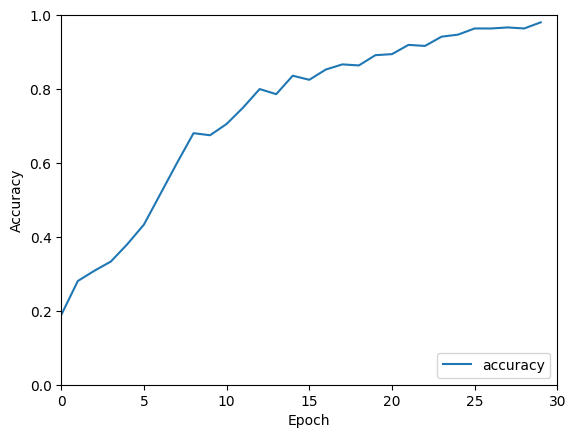

In [90]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, 30])
plt.legend(loc='lower right')
plt.show()


In [91]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9930 - loss: 0.2928 
Test Loss: 0.2987476587295532, Test Accuracy: 0.9866666793823242


In [ ]:
model.save('lego_classifier_model.h5')
